In [39]:
import numpy as np

In [40]:
import pandas as pd

In [41]:
import gc

In [42]:
import os

In [43]:
import matplotlib.pyplot as plt

In [44]:
import seaborn as sns

In [45]:
import plotly.express as px

In [46]:
import tensorflow as tf

In [47]:
import tensorflow.keras

In [48]:
from tensorflow.keras.models import Sequential

In [49]:
from tensorflow.keras.layers import Dense, LSTM, BatchNormalization, RNN, GRU

In [50]:
from tensorflow.keras.optimizers import Adam

In [51]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [52]:
from tensorflow.keras.regularizers import l2

In [53]:
from tensorflow.keras.utils import to_categorical

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [55]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [56]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

In [57]:
from sklearn.feature_selection import SelectFromModel, SelectKBest, RFE, chi2

In [58]:
from sklearn.feature_selection import VarianceThreshold

In [59]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [60]:
from sklearn.svm import LinearSVC

In [61]:
from sklearn.linear_model import LogisticRegression, LassoCV

In [62]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, IsolationForest

In [63]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix, explained_variance_score

In [64]:
from sklearn.model_selection import KFold

In [65]:
from imblearn.under_sampling import RandomUnderSampler

In [66]:
df = pd.read_csv("Darknet.CSV", keep_default_na = False,low_memory = False, error_bad_lines = False)

<ipython-input-66-4e99803f36e7>:1: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



Skipping line 328: expected 85 fields, saw 125



In [67]:
df.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158,216.58.220.99,443,6,24/07/2015 04:09:48 PM,229,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159,216.58.220.99,443,6,24/07/2015 04:09:48 PM,407,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160,216.58.220.99,443,6,24/07/2015 04:09:48 PM,431,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134,74.125.136.120,443,6,24/07/2015 04:09:48 PM,359,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697,173.194.65.127,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,0,0,0,0,1.437765e+15,3.117718e+06,1.437765e+15,1.437765e+15,Non-Tor,AUDIO-STREAMING


In [68]:
df.sample(10)

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
66104,10.152.152.11-94.21.33.166-36422-55573-6,10.152.152.11,36422,94.21.33.166,55573,6,24/02/2016 10:22:55 AM,1740159,2,0,...,0,0,0,0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,Non-Tor,P2P
47521,10.152.152.11-80.163.1.78-9100-55555-17,10.152.152.11,9100,80.163.1.78,55555,17,24/02/2016 10:10:59 AM,9817393,3,0,...,0,0,0,0,1.456323e+15,0.0,1.456323e+15,1.456323e+15,Non-Tor,P2P
110477,131.202.243.49-224.0.0.252-59425-5355-17,131.202.243.49,59425,224.0.0.252,5355,17,25/05/2015 02:21:28 PM,422149,2,0,...,0,0,0,0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,NonVPN,Chat
108918,131.202.240.185-224.0.0.252-50772-5355-17,131.202.240.185,50772,224.0.0.252,5355,17,25/05/2015 02:19:59 PM,411217,2,0,...,0,0,0,0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,NonVPN,Chat
92486,10.152.152.11-74.222.216.60-51555-18408-6,10.152.152.11,51555,74.222.216.60,18408,6,27/07/2015 11:57:38 AM,411,1,1,...,0,0,0,0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
40455,10.152.152.11-10.152.152.10-56800-53-17,10.152.152.11,56800,10.152.152.10,53,17,22/07/2015 01:55:55 PM,758948,1,1,...,0,0,0,0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,Non-Tor,Chat
73552,10.152.152.11-160.176.52.193-53029-2607-6,10.152.152.11,53029,160.176.52.193,2607,6,24/02/2016 11:08:29 AM,632,3,1,...,0,0,0,0,1.456327e+15,0.0,1.456327e+15,1.456327e+15,Non-Tor,P2P
100295,131.202.240.242-224.0.0.252-53060-5355-17,131.202.240.242,53060,224.0.0.252,5355,17,29/04/2015 02:09:55 PM,410291,2,0,...,0,0,0,0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,NonVPN,Chat
18611,216.58.209.102-10.152.152.11-443-37589-6,216.58.209.102,443,10.152.152.11,37589,6,23/02/2016 02:48:04 PM,31,1,1,...,0,0,0,0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,Non-Tor,Browsing
112578,216.58.219.238-131.202.240.150-80-49242-6,216.58.219.238,80,131.202.240.150,49242,6,01/04/2015 11:04:30 AM,76,1,1,...,0,0,0,0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,NonVPN,Video-Streaming


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141530 entries, 0 to 141529
Data columns (total 85 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Flow ID                     141530 non-null  object 
 1   Src IP                      141530 non-null  object 
 2   Src Port                    141530 non-null  int64  
 3   Dst IP                      141530 non-null  object 
 4   Dst Port                    141530 non-null  int64  
 5   Protocol                    141530 non-null  int64  
 6   Timestamp                   141530 non-null  object 
 7   Flow Duration               141530 non-null  int64  
 8   Total Fwd Packet            141530 non-null  int64  
 9   Total Bwd packets           141530 non-null  int64  
 10  Total Length of Fwd Packet  141530 non-null  int64  
 11  Total Length of Bwd Packet  141530 non-null  int64  
 12  Fwd Packet Length Max       141530 non-null  int64  
 13  Fwd Packet Len

In [70]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [71]:
reduce_mem_usage(df)

Memory usage after optimization is: 37.25 MB
Decreased by 59.4%


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158,216.58.220.99,443,6,24/07/2015 04:09:48 PM,229,1,1,...,0,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159,216.58.220.99,443,6,24/07/2015 04:09:48 PM,407,1,1,...,0,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160,216.58.220.99,443,6,24/07/2015 04:09:48 PM,431,1,1,...,0,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134,74.125.136.120,443,6,24/07/2015 04:09:48 PM,359,1,1,...,0,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697,173.194.65.127,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,0,0,0,0,1.437765e+15,3117718.25,1.437765e+15,1.437765e+15,Non-Tor,AUDIO-STREAMING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141525,10.8.8.246-224.0.0.252-55219-5355-17,10.8.8.246,55219,224.0.0.252,5355,17,22/05/2015 01:55:03 PM,411806,2,0,...,0,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,VPN,VOIP
141526,10.8.8.246-224.0.0.252-64207-5355-17,10.8.8.246,64207,224.0.0.252,5355,17,22/05/2015 02:09:05 PM,411574,2,0,...,0,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,VPN,VOIP
141527,10.8.8.246-224.0.0.252-61115-5355-17,10.8.8.246,61115,224.0.0.252,5355,17,22/05/2015 02:19:31 PM,422299,2,0,...,0,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,VPN,VOIP
141528,10.8.8.246-224.0.0.252-64790-5355-17,10.8.8.246,64790,224.0.0.252,5355,17,22/05/2015 02:29:55 PM,411855,2,0,...,0,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,VPN,VOIP


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141530 entries, 0 to 141529
Data columns (total 85 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Flow ID                     141530 non-null  object 
 1   Src IP                      141530 non-null  object 
 2   Src Port                    141530 non-null  int32  
 3   Dst IP                      141530 non-null  object 
 4   Dst Port                    141530 non-null  int32  
 5   Protocol                    141530 non-null  int8   
 6   Timestamp                   141530 non-null  object 
 7   Flow Duration               141530 non-null  int32  
 8   Total Fwd Packet            141530 non-null  int32  
 9   Total Bwd packets           141530 non-null  int32  
 10  Total Length of Fwd Packet  141530 non-null  int32  
 11  Total Length of Bwd Packet  141530 non-null  int32  
 12  Fwd Packet Length Max       141530 non-null  int32  
 13  Fwd Packet Len

In [73]:
df.rename(columns = {"Label" : "Type", "Label.1" : "Subtype"}, inplace = True)

In [74]:
df

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Type,Subtype
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158,216.58.220.99,443,6,24/07/2015 04:09:48 PM,229,1,1,...,0,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159,216.58.220.99,443,6,24/07/2015 04:09:48 PM,407,1,1,...,0,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160,216.58.220.99,443,6,24/07/2015 04:09:48 PM,431,1,1,...,0,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134,74.125.136.120,443,6,24/07/2015 04:09:48 PM,359,1,1,...,0,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697,173.194.65.127,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,0,0,0,0,1.437765e+15,3117718.25,1.437765e+15,1.437765e+15,Non-Tor,AUDIO-STREAMING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141525,10.8.8.246-224.0.0.252-55219-5355-17,10.8.8.246,55219,224.0.0.252,5355,17,22/05/2015 01:55:03 PM,411806,2,0,...,0,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,VPN,VOIP
141526,10.8.8.246-224.0.0.252-64207-5355-17,10.8.8.246,64207,224.0.0.252,5355,17,22/05/2015 02:09:05 PM,411574,2,0,...,0,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,VPN,VOIP
141527,10.8.8.246-224.0.0.252-61115-5355-17,10.8.8.246,61115,224.0.0.252,5355,17,22/05/2015 02:19:31 PM,422299,2,0,...,0,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,VPN,VOIP
141528,10.8.8.246-224.0.0.252-64790-5355-17,10.8.8.246,64790,224.0.0.252,5355,17,22/05/2015 02:29:55 PM,411855,2,0,...,0,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,VPN,VOIP


In [75]:
type_vc = df["Type"].value_counts()

In [76]:
px.bar(type_vc, x=type_vc.index, y = type_vc.values,
           color=type_vc.index, title="Dataset Type Wise Count",
          labels={'y': "Type Count", 'index': "Type Name"}, color_discrete_sequence=px.colors.qualitative.G10)

In [77]:
subtype_vc = df["Subtype"].value_counts()

In [78]:
px.bar(subtype_vc, x=subtype_vc.index, y = subtype_vc.values,
           color=subtype_vc.index, title="Dataset Sub Type Wise Count",
          labels={'y': "Sub Type Count", 'index': "Sub Type Name"}, color_discrete_sequence=px.colors.qualitative.T10)

In [79]:
df.groupby("Type")["Subtype"].unique()

Type
Non-Tor    [AUDIO-STREAMING, Browsing, Chat, Email, File-...
NonVPN     [Chat, Audio-Streaming, Email, File-Transfer, ...
Tor        [Audio-Streaming, Browsing, Chat, File-Transfe...
VPN        [File-Transfer, Chat, Audio-Streaming, Email, ...
Name: Subtype, dtype: object

In [80]:
df.groupby("Type")["Subtype"].nunique()

Type
Non-Tor    8
NonVPN     8
Tor        8
VPN        6
Name: Subtype, dtype: int64

In [81]:
df["Subtype"].loc[df["Subtype"] == "AUDIO-STREAMING"] = "Streaming"

<ipython-input-81-348475bc9e8e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [82]:
df["Subtype"].loc[df["Subtype"] == "File-transfer"] = "File-Transfer"

<ipython-input-82-e9a0487ae50d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [83]:
df["Subtype"].loc[df["Subtype"] == "Video-streaming"] = "Streaming"
df["Subtype"].loc[df["Subtype"] == "Video-Streaming"] = "Streaming"
df["Subtype"].loc[df["Subtype"] == "Audio-Streaming"] = "Streaming"

<ipython-input-83-f2a21825c4fc>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-83-f2a21825c4fc>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-83-f2a21825c4fc>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [84]:
df["Subtype"].loc[df["Subtype"] == "Chat"] = "Data-Transfer"
df["Subtype"].loc[df["Subtype"] == "Email"] = "Data-Transfer"
df["Subtype"].loc[df["Subtype"] == "VOIP"] = "Data-Transfer"
df["Subtype"].loc[df["Subtype"] == "File-Transfer"] = "Data-Transfer"

<ipython-input-84-5e9cf6a135c7>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-84-5e9cf6a135c7>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-84-5e9cf6a135c7>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-84-5e9cf6a135c7>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

In [85]:
subtype_vc = df["Subtype"].value_counts()

In [86]:
px.bar(subtype_vc, x=subtype_vc.index, y = subtype_vc.values,
           color=subtype_vc.index, title="Dataset Sub Type Wise Count",
          labels={'y': "Sub Type Count", 'index': "Sub Type Name"}, color_discrete_sequence=px.colors.qualitative.T10)

In [87]:
df.groupby("Type")["Subtype"].value_counts()

Type     Subtype      
Non-Tor  P2P              48300
         Browsing         32545
         Data-Transfer     7645
         Streaming         4866
NonVPN   Data-Transfer    15528
         Streaming         8335
Tor      Data-Transfer      483
         Streaming          426
         Browsing           263
         P2P                220
VPN      Streaming        14204
         Data-Transfer     8715
Name: Subtype, dtype: int64

In [88]:
df.groupby("Type")["Subtype"].nunique()

Type
Non-Tor    4
NonVPN     2
Tor        4
VPN        2
Name: Subtype, dtype: int64

In [89]:
df.loc[:, "Encryption"] = ''

In [90]:
df

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Type,Subtype,Encryption
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158,216.58.220.99,443,6,24/07/2015 04:09:48 PM,229,1,1,...,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,Non-Tor,Streaming,
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159,216.58.220.99,443,6,24/07/2015 04:09:48 PM,407,1,1,...,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,Non-Tor,Streaming,
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160,216.58.220.99,443,6,24/07/2015 04:09:48 PM,431,1,1,...,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,Non-Tor,Streaming,
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134,74.125.136.120,443,6,24/07/2015 04:09:48 PM,359,1,1,...,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,Non-Tor,Streaming,
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697,173.194.65.127,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,0,0,0,1.437765e+15,3117718.25,1.437765e+15,1.437765e+15,Non-Tor,Streaming,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141525,10.8.8.246-224.0.0.252-55219-5355-17,10.8.8.246,55219,224.0.0.252,5355,17,22/05/2015 01:55:03 PM,411806,2,0,...,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,VPN,Data-Transfer,
141526,10.8.8.246-224.0.0.252-64207-5355-17,10.8.8.246,64207,224.0.0.252,5355,17,22/05/2015 02:09:05 PM,411574,2,0,...,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,VPN,Data-Transfer,
141527,10.8.8.246-224.0.0.252-61115-5355-17,10.8.8.246,61115,224.0.0.252,5355,17,22/05/2015 02:19:31 PM,422299,2,0,...,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,VPN,Data-Transfer,
141528,10.8.8.246-224.0.0.252-64790-5355-17,10.8.8.246,64790,224.0.0.252,5355,17,22/05/2015 02:29:55 PM,411855,2,0,...,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,VPN,Data-Transfer,


In [91]:
df["Encryption"].loc[df["Type"] == "Non-Tor"] = "Standard"

<ipython-input-91-49eeedf3490e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [92]:
df["Encryption"].loc[df["Type"] == "NonVPN"] = "Standard"

<ipython-input-92-f1f86595ba13>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [93]:
df["Encryption"].loc[df["Type"] == "Tor"] = "High"

<ipython-input-93-eb061d1a682c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [94]:
df["Encryption"].loc[df["Type"] == "VPN"] = "High"

<ipython-input-94-d748577be4e7>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [95]:
df

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Type,Subtype,Encryption
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158,216.58.220.99,443,6,24/07/2015 04:09:48 PM,229,1,1,...,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,Non-Tor,Streaming,Standard
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159,216.58.220.99,443,6,24/07/2015 04:09:48 PM,407,1,1,...,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,Non-Tor,Streaming,Standard
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160,216.58.220.99,443,6,24/07/2015 04:09:48 PM,431,1,1,...,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,Non-Tor,Streaming,Standard
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134,74.125.136.120,443,6,24/07/2015 04:09:48 PM,359,1,1,...,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,Non-Tor,Streaming,Standard
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697,173.194.65.127,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,0,0,0,1.437765e+15,3117718.25,1.437765e+15,1.437765e+15,Non-Tor,Streaming,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141525,10.8.8.246-224.0.0.252-55219-5355-17,10.8.8.246,55219,224.0.0.252,5355,17,22/05/2015 01:55:03 PM,411806,2,0,...,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,VPN,Data-Transfer,High
141526,10.8.8.246-224.0.0.252-64207-5355-17,10.8.8.246,64207,224.0.0.252,5355,17,22/05/2015 02:09:05 PM,411574,2,0,...,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,VPN,Data-Transfer,High
141527,10.8.8.246-224.0.0.252-61115-5355-17,10.8.8.246,61115,224.0.0.252,5355,17,22/05/2015 02:19:31 PM,422299,2,0,...,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,VPN,Data-Transfer,High
141528,10.8.8.246-224.0.0.252-64790-5355-17,10.8.8.246,64790,224.0.0.252,5355,17,22/05/2015 02:29:55 PM,411855,2,0,...,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,VPN,Data-Transfer,High


In [96]:
df.isnull().sum()

Flow ID       0
Src IP        0
Src Port      0
Dst IP        0
Dst Port      0
             ..
Idle Max      0
Idle Min      0
Type          0
Subtype       0
Encryption    0
Length: 86, dtype: int64

In [97]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [98]:
df.isnull().sum().sum()

49

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141530 entries, 0 to 141529
Data columns (total 86 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Flow ID                     141530 non-null  object 
 1   Src IP                      141530 non-null  object 
 2   Src Port                    141530 non-null  int32  
 3   Dst IP                      141530 non-null  object 
 4   Dst Port                    141530 non-null  int32  
 5   Protocol                    141530 non-null  int8   
 6   Timestamp                   141530 non-null  object 
 7   Flow Duration               141530 non-null  int32  
 8   Total Fwd Packet            141530 non-null  int32  
 9   Total Bwd packets           141530 non-null  int32  
 10  Total Length of Fwd Packet  141530 non-null  int32  
 11  Total Length of Bwd Packet  141530 non-null  int32  
 12  Fwd Packet Length Max       141530 non-null  int32  
 13  Fwd Packet Len

In [100]:
df["Encryption"]

0         Standard
1         Standard
2         Standard
3         Standard
4         Standard
            ...   
141525        High
141526        High
141527        High
141528        High
141529        High
Name: Encryption, Length: 141530, dtype: object

In [101]:
df["Encryption"] = df["Encryption"].map({"Standard":0,"High":1})

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141530 entries, 0 to 141529
Data columns (total 86 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Flow ID                     141530 non-null  object 
 1   Src IP                      141530 non-null  object 
 2   Src Port                    141530 non-null  int32  
 3   Dst IP                      141530 non-null  object 
 4   Dst Port                    141530 non-null  int32  
 5   Protocol                    141530 non-null  int8   
 6   Timestamp                   141530 non-null  object 
 7   Flow Duration               141530 non-null  int32  
 8   Total Fwd Packet            141530 non-null  int32  
 9   Total Bwd packets           141530 non-null  int32  
 10  Total Length of Fwd Packet  141530 non-null  int32  
 11  Total Length of Bwd Packet  141530 non-null  int32  
 12  Fwd Packet Length Max       141530 non-null  int32  
 13  Fwd Packet Len

In [103]:
df.dropna(inplace=True)

In [104]:
y = df["Subtype"]

In [105]:
le = LabelEncoder()

In [106]:
y = le.fit_transform(y)

In [107]:
X = df.select_dtypes(exclude=["object"])

In [108]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141481 entries, 0 to 141529
Data columns (total 79 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Src Port                    141481 non-null  int32  
 1   Dst Port                    141481 non-null  int32  
 2   Protocol                    141481 non-null  int8   
 3   Flow Duration               141481 non-null  int32  
 4   Total Fwd Packet            141481 non-null  int32  
 5   Total Bwd packets           141481 non-null  int32  
 6   Total Length of Fwd Packet  141481 non-null  int32  
 7   Total Length of Bwd Packet  141481 non-null  int32  
 8   Fwd Packet Length Max       141481 non-null  int32  
 9   Fwd Packet Length Min       141481 non-null  int16  
 10  Fwd Packet Length Mean      141481 non-null  float16
 11  Fwd Packet Length Std       141481 non-null  float16
 12  Bwd Packet Length Max       141481 non-null  int32  
 13  Bwd Packet Len

In [109]:
num_features_opt = 25

In [110]:
num_features_max = 35

In [111]:
features_best = []

In [112]:
lsvc = LinearSVC(C=0.1, penalty="l1", dual=False).fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [113]:
model = SelectFromModel(lsvc, prefit=True)

In [114]:
X_new = model.transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names



In [115]:
X_selected_df = pd.DataFrame(X_new, columns=[X.columns[i] for i in range(len(X.columns)) if model.get_support()[i]])

In [116]:
features_best.append(X_selected_df.columns.tolist())

In [117]:
lasso = LassoCV(cv=3).fit(X, y)
model = SelectFromModel(lasso, prefit=True)
X_new = model.transform(X)
X_selected_df = pd.DataFrame(X_new, columns=[X.columns[i] for i in range(len(X.columns)) if model.get_support()[i]])
features_best.append(X_selected_df.columns.tolist())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 83.11956081805693, tolerance: 12.665635873241479

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 390.77783443995577, tolerance: 12.665635873241479

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1695.1740401205752, tolerance: 12.665635873241479

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 3038.6199345259665, tolerance: 1

In [118]:
X

,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Encryption
0,57158,443,6,229,1,1,0,0,0,0,...,20,0,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0
1,57159,443,6,407,1,1,0,0,0,0,...,20,0,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0
2,57160,443,6,431,1,1,0,0,0,0,...,20,0,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0
3,49134,443,6,359,1,1,0,0,0,0,...,20,0,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0
4,34697,19305,6,10778451,591,400,64530,6659,131,0,...,20,0,0,0,0,1.437765e+15,3117718.25,1.437765e+15,1.437765e+15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141525,55219,5355,17,411806,2,0,44,0,22,22,...,8,0,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,1
141526,64207,5355,17,411574,2,0,44,0,22,22,...,8,0,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,1
141527,61115,5355,17,422299,2,0,44,0,22,22,...,8,0,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,1
141528,64790,5355,17,411855,2,0,44,0,22,22,...,8,0,0,0,0,0.000000e+00,0.00,0.000000e+00,0.000000e+00,1


In [119]:
bestfeatures = SelectKBest()
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning:

Features [32 33 34 49 50 51 56 57 58 59 64 70 71 72 73] are constant.

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning:

invalid value encountered in divide



In [120]:
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_features_max, step=10, verbose=5)
rfe_selector.fit(X, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
features_best.append(rfe_feature)

Fitting estimator with 79 features.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Fitting estimator with 69 features.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Fitting estimator with 59 features.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Fitting estimator with 49 features.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Fitting estimator with 39 features.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [121]:
selector = VarianceThreshold(threshold=10)
np.shape(selector.fit_transform(X))
features_best.append(list(np.array(X.columns)[selector.get_support(indices=False)]))

In [122]:
main_cols = []
main_cols_opt = {feature_name : 0 for feature_name in df.columns.tolist()}
for i in range(len(features_best)):
    for feature_name in features_best[i]:
        main_cols_opt[feature_name] += 1

In [123]:
df_main_cols_opt = pd.DataFrame.from_dict(main_cols_opt, orient='index', columns=['Num'])
df_main_cols_opt.sort_values(by=['Num'], ascending=False)

,Num
Bwd Packets/s,3
Total Fwd Packet,3
Fwd Packets/s,3
Bwd Header Length,3
Fwd Header Length,3
...,...
CWE Flag Count,0
Bwd Bytes/Bulk Avg,0
Fwd Bulk Rate Avg,0
Fwd Packet/Bulk Avg,0


In [124]:
main_cols = df_main_cols_opt.nlargest(num_features_opt, 'Num').index.tolist()

In [125]:
main_cols

['Src Port',
 'Dst Port',
 'Total Fwd Packet',
 'Total Bwd packets',
 'Fwd Header Length',
 'Bwd Header Length',
 'Fwd Packets/s',
 'Bwd Packets/s',
 'ACK Flag Count',
 'FWD Init Win Bytes',
 'Bwd Init Win Bytes',
 'Protocol',
 'Flow Duration',
 'Total Length of Fwd Packet',
 'Total Length of Bwd Packet',
 'Fwd Packet Length Max',
 'Fwd Packet Length Min',
 'Fwd Packet Length Mean',
 'Fwd Packet Length Std',
 'Bwd Packet Length Max',
 'Bwd Packet Length Min',
 'Bwd Packet Length Mean',
 'Bwd Packet Length Std',
 'Flow Packets/s',
 'Flow IAT Mean']

In [126]:
X = df[main_cols]

In [131]:
base_models = [("ADA_model", AdaBoostClassifier(random_state=42)),
               ("RF_model", RandomForestClassifier(random_state=42,n_jobs=-1)),
               ("GB_model", GradientBoostingClassifier(random_state=42)),
               ("ET_model", ExtraTreesClassifier(random_state=42)),
               ("IF_model",IsolationForest(random_state=42))]

In [128]:
kfolds = 4

In [129]:
split = KFold(n_splits=kfolds, shuffle=True, random_state=42)

In [130]:
for name, model in base_models:
    cv_results = cross_val_score(model,
                                 X, y,
                                 cv=split,
                                 scoring="accuracy",
                                 n_jobs=-1)
    min_score = round(min(cv_results), 4)
    max_score = round(max(cv_results), 4)
    mean_score = round(np.mean(cv_results), 4)
    std_dev = round(np.std(cv_results), 4)
    print(f"{name} cross validation accuarcy score: {mean_score} +/- {std_dev} (std) min: {min_score}, max: {max_score}, ")

ADA_model cross validation accuarcy score: 0.8062 +/- 0.0082 (std) min: 0.796, max: 0.8145, 
RF_model cross validation accuarcy score: 0.9501 +/- 0.001 (std) min: 0.9489, max: 0.9514, 
GB_model cross validation accuarcy score: 0.9167 +/- 0.0018 (std) min: 0.9149, max: 0.9186, 


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



ET_model cross validation accuarcy score: 0.9482 +/- 0.0009 (std) min: 0.9467, max: 0.9489, 
IF_model cross validation accuarcy score: 0.2083 +/- 0.0026 (std) min: 0.2046, max: 0.2107, 


In [132]:
X = df[['Src Port',
 'Dst Port',
 'Total Fwd Packet',
 'Total Bwd packets',
 'Fwd Header Length',
 'Bwd Header Length',
 'Fwd Packets/s',
 'Bwd Packets/s',
 'ACK Flag Count',
 'FWD Init Win Bytes',
 'Bwd Init Win Bytes',
 'Protocol',
 'Flow Duration',
 'Total Length of Fwd Packet',
 'Total Length of Bwd Packet',
 'Fwd Packet Length Max',
 'Fwd Packet Length Min',
 'Fwd Packet Length Mean',
 'Fwd Packet Length Std',
 'Bwd Packet Length Max',
 'Bwd Packet Length Min',
 'Bwd Packet Length Mean',
 'Bwd Packet Length Std',
 'Flow Packets/s',
 'Flow IAT Mean']]

In [133]:
y = df["Subtype"]

In [134]:
y = le.fit_transform(y)

In [135]:
y = to_categorical(y)

In [136]:
rus = RandomUnderSampler(random_state=1)

In [137]:
X_sampled, y_sampled = rus.fit_resample(X, y)

In [138]:
X_sampled.shape, y_sampled.shape

((111192, 25), (111192, 4))

In [139]:
ss = StandardScaler()

In [140]:
X_scaled = ss.fit_transform(X_sampled)

In [141]:
X_scaled

array([[-1.97874951,  1.43437284, -0.06335469, ..., -0.3397615 ,
         7.1084571 , -0.35704727],
       [-1.9599626 ,  1.1783457 , -0.06294979, ..., -0.3397615 ,
         4.36436105, -0.35704683],
       [ 0.40920732, -0.71724166, -0.06254489, ..., -0.3397615 ,
        -0.20911886, -0.09174359],
       ...,
       [ 0.04045586, -0.70018884, -0.05849588, ...,  2.6451352 ,
        -0.20850285, -0.35260702],
       [-1.97874951,  1.99612926, -0.06335469, ..., -0.3397615 ,
         1.62026501, -0.35704507],
       [ 0.8830206 , -0.47540171, -0.06254489, ..., -0.3397615 ,
        -0.20913114,  2.30340372]])

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_sampled, test_size=0.20, random_state=42, stratify=y_sampled)

In [143]:
X_train.shape

(88953, 25)

In [144]:
def create_model():
    model = Sequential()
    model.add(LSTM(input_shape=(25, 1), units=512, activation='relu',return_sequences=False, return_state=False,))
    model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'softmax'))
    return model

In [145]:
model = create_model()

In [146]:
model.compile(loss='categorical_crossentropy', metrics=["accuracy"], optimizer="adam")

In [147]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 512)               1052672   
                                                                 
 dense (Dense)               (None, 32)                16416     
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
Total params: 1071460 (4.09 MB)
Trainable params: 1071460 (4.09 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [148]:
#X_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)

In [149]:
X_train.shape

(88953, 25)

In [150]:
history = model.fit(x = X_train, y = y_train, batch_size=256, validation_split=0.2, verbose=1, epochs = 20)

Epoch 1/20
278/278 [==============================] - 341s 1s/step - loss: 1.0607 - accuracy: 0.5139 - val_loss: 0.8553 - val_accuracy: 0.6372
Epoch 2/20
278/278 [==============================] - 343s 1s/step - loss: 0.7746 - accuracy: 0.6886 - val_loss: 0.7003 - val_accuracy: 0.7318
Epoch 3/20
278/278 [==============================] - 341s 1s/step - loss: 0.6601 - accuracy: 0.7432 - val_loss: 0.6107 - val_accuracy: 0.7701
Epoch 4/20
278/278 [==============================] - 336s 1s/step - loss: 0.5519 - accuracy: 0.7880 - val_loss: 0.5243 - val_accuracy: 0.7996
Epoch 5/20
278/278 [==============================] - 335s 1s/step - loss: 0.4954 - accuracy: 0.8106 - val_loss: 0.5466 - val_accuracy: 0.7815
Epoch 6/20
278/278 [==============================] - 333s 1s/step - loss: 0.4747 - accuracy: 0.8226 - val_loss: 0.5196 - val_accuracy: 0.8049
Epoch 7/20
278/278 [==============================] - 316s 1s/step - loss: 0.4568 - accuracy: 0.8288 - val_loss: 0.4300 - val_accuracy: 0.8423

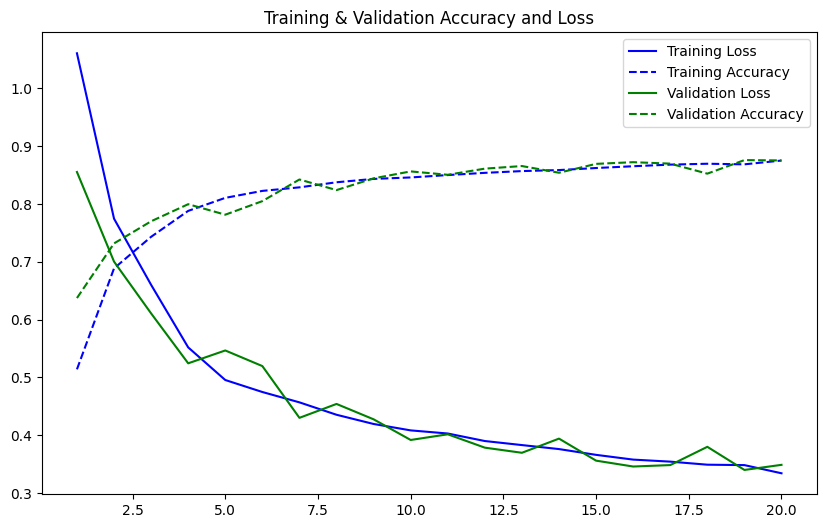

In [151]:
epochs = range(1, len(history.history["loss"]) + 1)

plt.rcParams["figure.figsize"] = (10,6)

train_loss = history.history["loss"]
train_acc = history.history["accuracy"]
plt.plot(epochs, train_loss, "-b", label = "Training Loss")
plt.plot(epochs, train_acc, "--b", label = "Training Accuracy")

val_los = history.history["val_loss"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, val_los, "-g", label = "Validation Loss")
plt.plot(epochs, val_acc, "--g", label = "Validation Accuracy")

plt.title("Training & Validation Accuracy and Loss")
plt.legend()

In [152]:
y_pred = model.predict(X_test)

695/695 [==============================] - 49s 71ms/step


In [153]:
y_pred = np.argmax(y_pred, axis=1)

In [154]:
y_pred

array([0, 2, 3, ..., 1, 0, 0])

In [155]:
y_test

array([[1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       ...,
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0]])

In [156]:
y_test = np.argmax(y_test,axis=1)

In [157]:
y_test

array([0, 2, 1, ..., 1, 0, 0])

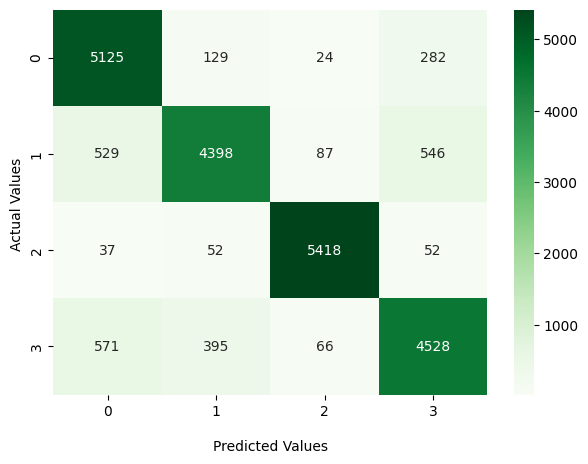

In [158]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,5))

ax = sns.heatmap(cm,fmt='d', annot=True, cmap='Greens')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
plt.show()